In [13]:
import glob
import joblib
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



### Preprocessing

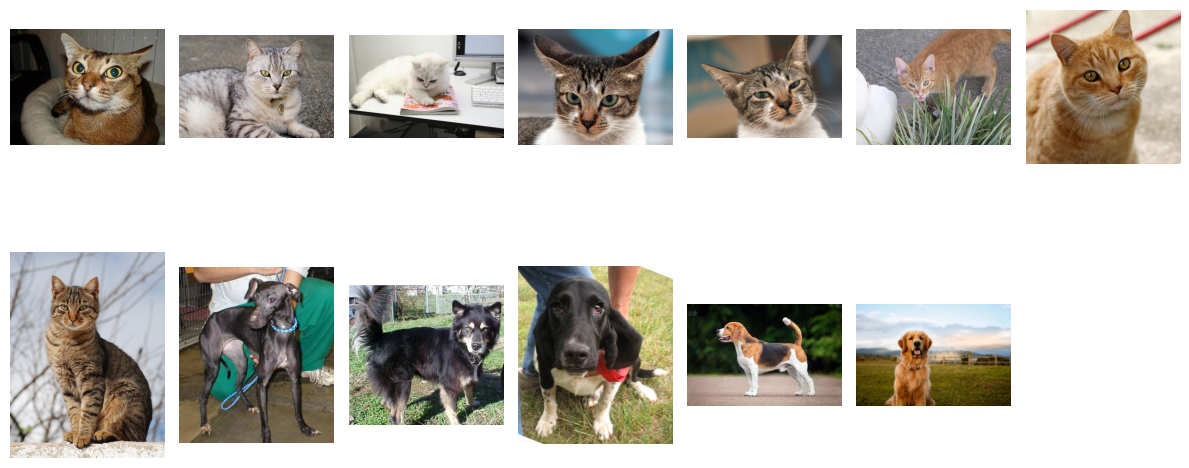

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

image_paths = glob.glob("./dataset/test/*.jpg")  # Modify the pattern as per your image files

num_images = len(image_paths)
num_rows = 2  # Number of subplot rows
num_cols = (num_images + 1) // num_rows  # Number of subplot columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, image_path in enumerate(image_paths):
    image = mpimg.imread(image_path)
    # gray_image = Image.fromarray(image).convert('L')
    # resized_image = gray_image.resize((64, 64))
    ax = axes[i // num_cols, i % num_cols]  # Get the appropriate subplot axes
    ax.imshow(image)
    ax.axis('off')

# If the number of images is not a multiple of the number of subplots, remove any empty subplots
if num_images % num_cols != 0:
    for i in range(num_images % num_cols, num_cols):
        fig.delaxes(axes[num_images // num_cols, i])

plt.tight_layout()
plt.show()


In [15]:
# Define a function to extract features from an image
def extract_features(image):
    # Example: Convert the image to grayscale and resize it to a fixed size
    gray_image = image.convert('L')
    resized_image = gray_image.resize((64, 64))
    
    # Flatten the image into a 1D array
    feature_vector = np.array(resized_image).flatten()
    
    return feature_vector

In [16]:
# Define the image categories
categories = ['cats', 'dogs']

# Define the path to the image dataset
dataset_path = './dataset/train2/'

# Load the images and extract features
data = []
target = []

for category in categories:
    image_files = glob.glob(dataset_path + category + '/*.jpg')
    for image_file in image_files:
        image = Image.open(image_file)
        feature_vector = extract_features(image)
        data.append(feature_vector)
        target.append(category)



In [17]:
print(len(data), target)

742 ['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'ca

In [18]:
# Convert the data and target lists into numpy arrays
data = np.array(data)
target = np.array(target)



In [19]:
data.shape

(742, 4096)

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [21]:
X_train

array([[172, 177, 191, ..., 227, 226, 222],
       [ 34,  35,  35, ...,   0,  28,  88],
       [130,  94,  99, ..., 247, 197,  57],
       ...,
       [181, 207, 205, ...,  39,  41,  42],
       [ 83, 100,  86, ...,  15,  64, 124],
       [211, 211, 210, ..., 151, 147, 145]], dtype=uint8)

In [26]:
# Create a Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train);

### Saving the Model

In [27]:
# Save the trained model
model_path = './Model/NBC.pkl'
joblib.dump(model, model_path)

['./Model/NBC.pkl']

In [28]:
# Make predictions on the testing set
y_pred = model.predict(X_test)



In [29]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5838926174496645


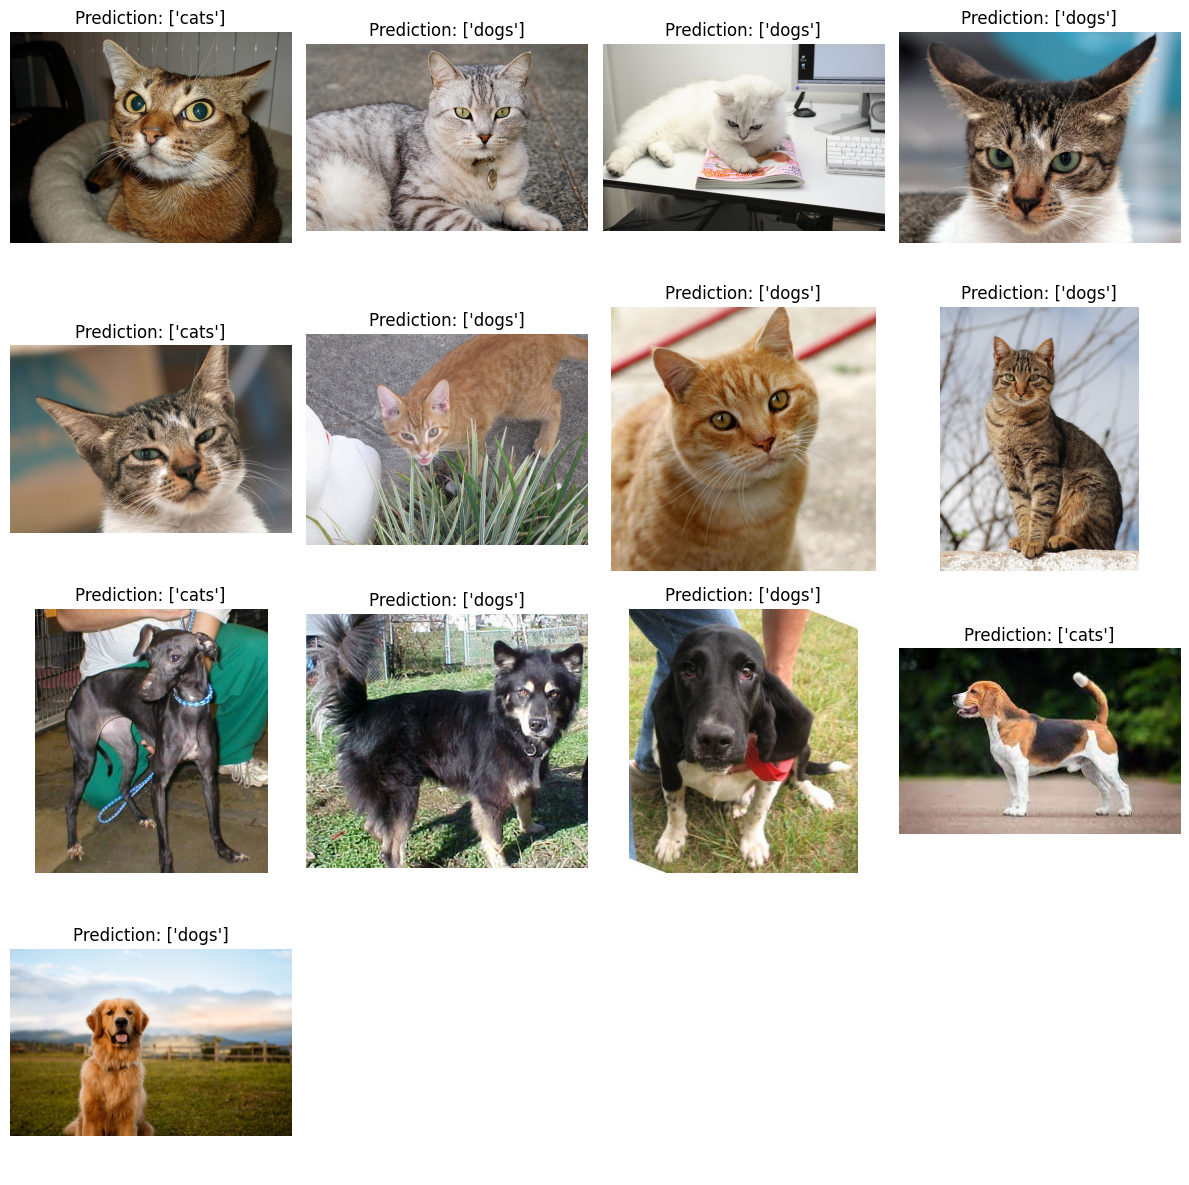

In [30]:
# Load the saved model
model_path = './Model/NBC.pkl'
saved_model = joblib.load(model_path)

# Use the saved model for predictions and subplot visualization
new_images_path = './dataset/test/*.jpg'
new_images = glob.glob(new_images_path)

num_images = len(new_images)
num_rows = (num_images + 3) // 4  # Calculate the number of rows needed for the grid

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, 3*num_rows))

for i, image_path in enumerate(new_images):
    image = Image.open(image_path)
    feature_vector = extract_features(image)
    
    # Make prediction using the loaded model
    prediction = saved_model.predict([feature_vector])
    
    # Calculate the subplot index
    row_idx = i // 4
    col_idx = i % 4
    
    # Display the image and prediction
    axes[row_idx, col_idx].imshow(image)
    axes[row_idx, col_idx].set_title(f'Prediction: {prediction}')
    axes[row_idx, col_idx].axis('off')

# Remove any empty subplots if the number of images is not a multiple of 4
if num_images % 4 != 0:
    for i in range(num_images, num_rows * 4):
        axes[num_rows-1, i % 4].axis('off')

plt.tight_layout()
plt.show()

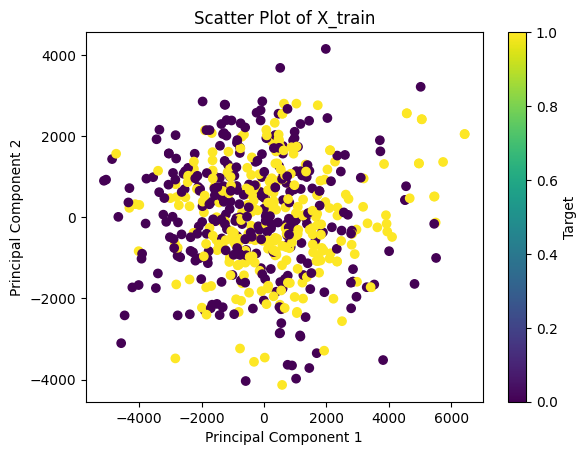

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA to reduce the dimensionality of X_train to 2 dimensions
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# Convert categorical target values to numeric labels
label_dict = {label: idx for idx, label in enumerate(np.unique(y_train))}
y_train_numeric = np.array([label_dict[label] for label in y_train])

# Create a scatter plot of the 2D data
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_numeric, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of X_train')
plt.colorbar(label='Target')
plt.show()

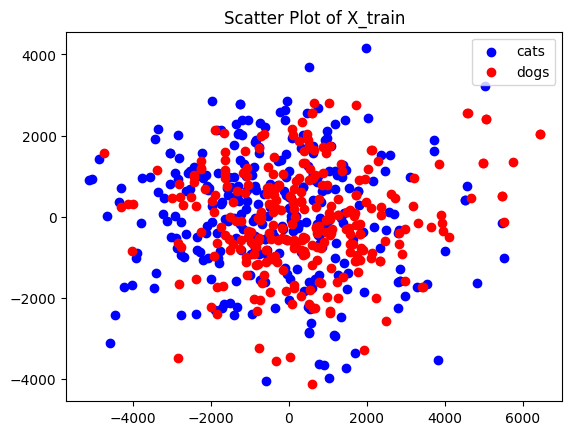

In [62]:
# Split X_train into cats and dogs
cats_indices = np.where(y_train == "cats")
dogs_indices = np.where(y_train == "dogs")

# Create a scatter plot of the 2D data
plt.scatter(X_train_2d[cats_indices, 0], X_train_2d[cats_indices, 1], c='blue', label='cats')
plt.scatter(X_train_2d[dogs_indices, 0], X_train_2d[dogs_indices, 1], c='red', label='dogs')
plt.title('Scatter Plot of X_train')
plt.legend()
plt.show()